# Курсовой проект

автор: Укладников Андрей

In [108]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR, Ridge
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score as r2,mean_squared_error as MSE
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('train.csv')

In [110]:
data=df.copy()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [112]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [113]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [114]:
data.shape

(10000, 20)

Исследование поля 'Healthcare_1'

Количество значимых величин Поля 'Healthcare_1' почти половина от числа всех наблюдений - 5202 ~ 10000/2, что слишком много,
поэтому лучше было бы вообще удалить это поле

In [115]:
data = data.drop(['Healthcare_1'],axis=1)

Исследование поля 'LifeSquare'

Количество значимых величин Поля 'LifeSquare' - 7887, что примерно немного больше, чем 3/4 от полного числа наблюдений (10000),
что все таки достаточно много, однако нужно пропущенные значения восстановить.
Можно попытыться эти недостающие значения заменить медианными значениями. 
Напишем функцию для заполнения средним знчением пропущенных величин.

In [116]:
def fillna_lifesquare(df,df_source):
    df['LifeSquare']=df['LifeSquare'].fillna(df_source['LifeSquare'].mean())    
    return df

In [117]:
data=fillna_lifesquare(data,data)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [119]:
data.loc[data.LifeSquare.isna().values==True,'LifeSquare']

Series([], Name: LifeSquare, dtype: float64)

In [120]:
data.loc[data.LifeSquare>data.Square.max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366


LifeSquare делаем равным 74.8

In [121]:
data.loc[data.LifeSquare>data.Square.max(),'LifeSquare']=74.8

In [122]:
data.loc[4328,'LifeSquare']

74.8

In [123]:
data.loc[(data.LifeSquare > data.Square),'LifeSquare'] = data.Square-10

In [124]:
data.loc[(data.LifeSquare > 120) & (data.Rooms < 4)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1641,11055,151,1.0,174.649522,164.649522,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698
1867,3267,58,3.0,138.980817,138.004600,43.0,2,2.0,1977,0.437885,B,B,23,5735,3,0,5,B,169528.896664
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
2708,12570,62,3.0,137.907783,136.697187,15.0,4,3.0,1977,0.072158,B,B,2,629,1,0,0,A,295412.633601
3183,542,23,3.0,135.164231,125.164231,0.0,2,0.0,1977,0.014073,B,B,2,475,0,0,0,B,166687.735824
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566
3651,5300,30,3.0,169.509941,159.509941,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,0,0,B,228572.520347


In [125]:
data.loc[(data.LifeSquare > 120) & (data.Rooms == 3), 'LifeSquare'] = 90

In [126]:
data.loc[(data.LifeSquare > 120) & (data.Rooms == 2), 'LifeSquare'] = 60

In [127]:
data.loc[(data.LifeSquare > 120) & (data.Rooms == 1), 'LifeSquare'] = 40

In [128]:
data.LifeSquare.max()

233.94930927416888

In [129]:
data.loc[(data.LifeSquare > 120) & (data.Rooms >= 4)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
8511,4249,23,5.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0,0,B,345665.209100
9910,16568,27,4.0,200.334539,190.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


In [130]:
data.loc[(data.LifeSquare > 120) & (data.Rooms == 4), 'LifeSquare'] = 120

In [131]:
data.loc[(data.LifeSquare > 120) & (data.Rooms == 5), 'LifeSquare'] = 160

In [132]:
data.loc[data.LifeSquare==data.LifeSquare.max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887


Исследование поля 'HouseYear'

Найдем записи, для которых  год боьше 2021 и меньше 1700

In [133]:
data.loc[(data.HouseYear>2021) | (data.HouseYear<1700)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


Изменим год постройки, исходя из того, что в 1 случае мы имеем диапазон лет постройки, а во 2 случае - описку.

In [134]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008

In [135]:
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [136]:
data.loc[1497,'HouseYear']

2008

In [137]:
data.loc[4189,'HouseYear']

1968

Исследование поля 'Rooms'

Число комнат более 5 д.б. подозрительно

In [138]:
data.loc[data.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


index=377 - скорее всего 2-комнатная квартира, index=1454 - скорее всего 1-комнатная, index=2170 - 2-комнатная,8849 - 2-комнатная

In [139]:
big_rooms_count_arr_index = data.loc[data.Rooms>5].index

In [140]:
data.loc[377,'Rooms']=2
data.loc[1454,'Rooms']=1
data.loc[2170,'Rooms']=2
data.loc[8849,'Rooms']=2


In [141]:
data.loc[big_rooms_count_arr_index]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,2.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


Записи с 0 количеством комнат делаем как записи с 1 комнатой.

In [142]:
data.loc[data['Rooms']==0,'Rooms']=1

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


Исследование поля  Square

In [144]:
index_array_square=data.loc[data.Square<10].index

In [145]:
data.loc[index_array_square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,-4.502939,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,-7.403649,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,-5.619274,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,-4.870778,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,-5.609669,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,-8.863141,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,-5.176321,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,-8.011057,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006


Удаляем эти данные

In [146]:
data=data.drop(index_array_square,axis=0)

Проверим отрицательные значения

In [147]:
data.loc[(data.LifeSquare<0) | (data.Square<0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [148]:
data.Square.max()

641.0651927456407

In [149]:
data.loc[data.Square>180]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
1981,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,160.000000,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,37.199645,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
4690,2307,102,1.0,409.425181,40.000000,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
5087,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,2,5,B,340273.238253
6977,11602,30,2.0,641.065193,60.000000,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
7201,3233,129,4.0,186.692602,87.487080,32.0,3,3.0,2011,0.020741,B,B,24,5613,5,2,5,B,423443.464367
8511,4249,23,5.0,198.930182,160.000000,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0,0,B,345665.209100


Присвоим примерно реальные значения для таких выбросов.

In [150]:
data.loc[652,'Square']=130
data.loc[1982,'Square']=190
data.loc[4262,'Square']=60.47
data.loc[4690,'Square']=49.42
data.loc[5087,'Square']=125.9
data.loc[6977,'Square']=70
data.loc[7201,'Square']=126.7
data.loc[9910,'Square']=130
data.loc[4487,'LifeSquare']=160


In [151]:
data.loc[data.Square>180]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,190.000000,160.000000,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4487,13434,13,5.0,183.382273,160.000000,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
8511,4249,23,5.0,198.930182,160.000000,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0,0,B,345665.209100


Выдвинем гипотезу, что площадь должна быть примерно = кол-во комнат * 40 +20

In [152]:
def prepare_square(df):
    df.loc[df['Square']>(df['Rooms']*40+20),'Square']=df['Rooms']*40+20
    df.loc[df['Square']<(df['Rooms']*15),'Square']=df['Rooms']*15
    return df

In [153]:
data=prepare_square(data)


Исследование поля KitchenSquare

In [154]:
data.loc[data.KitchenSquare<0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [155]:
data.loc[data.KitchenSquare>100]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,0,0,A,315245.521059
4651,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,0,5,B,296165.936689
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275
9895,2737,27,3.0,123.430072,113.430072,123.0,5,10.0,2015,0.017647,B,B,2,469,0,0,0,B,234194.837047


Удаляем такие значения

In [156]:
index_large_kitchen=data.loc[data.KitchenSquare>100].index
data.drop(index_large_kitchen,axis=0,inplace=True)

In [157]:
data.loc[data.KitchenSquare<=2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,37.199645,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664
8,5172,1,2.0,64.511437,37.199645,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999
12,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,5,15,B,229220.372609
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,0,0,A,140647.565937
21,11935,27,2.0,64.711835,37.199645,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,37.199645,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,37.199645,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,244145.827069
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,0,0,A,337299.867936
27,7550,23,2.0,64.556209,37.199645,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,173910.923723


In [158]:
data.KitchenSquare.mean()

5.849143544024842

Заменим значения меньше 3 средним значением

In [159]:
data.loc[data.KitchenSquare<=2,'KitchenSquare']=data.KitchenSquare.mean()

In [160]:
data.loc[data.KitchenSquare>50,'KitchenSquare']=data.KitchenSquare.mean()

Исследование полей Floor и HouseFloor

Если Floor больше, чем всего количества этажей в доме, то HouseFloor=Floor

In [161]:
data.loc[data.Floor>data.HouseFloor,'HouseFloor']=data.loc[data.Floor>data.HouseFloor,'Floor']

In [162]:
data.loc[data.HouseFloor<=0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [163]:
data.loc[data.HouseFloor>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,5.849144,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,61.747869,9.000000,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,65.773749,55.773749,5.849144,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520


In [164]:
data.loc[data.HouseFloor>50,'HouseFloor']=data.loc[data.HouseFloor>50,'HouseFloor']/10

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9999
Data columns (total 19 columns):
Id               9983 non-null int64
DistrictId       9983 non-null int64
Rooms            9983 non-null float64
Square           9983 non-null float64
LifeSquare       9983 non-null float64
KitchenSquare    9983 non-null float64
Floor            9983 non-null int64
HouseFloor       9983 non-null float64
HouseYear        9983 non-null int64
Ecology_1        9983 non-null float64
Ecology_2        9983 non-null object
Ecology_3        9983 non-null object
Social_1         9983 non-null int64
Social_2         9983 non-null int64
Social_3         9983 non-null int64
Helthcare_2      9983 non-null int64
Shops_1          9983 non-null int64
Shops_2          9983 non-null object
Price            9983 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.5+ MB


Исследование объектных переменных и превращение их в Дамми переменные

Все объектные переменные, мало влияющие на цену, превратим в dummy

In [166]:
data = pd.get_dummies(data)

Исследование поля DistrictId

In [167]:
data.DistrictId.unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

Введем среднюю цену по регионам DistrictId и комнатам, которая может влиять на цену:

In [168]:
stats1=data.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})
stats1.head()

,DistrictId,Rooms,mean_price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147053.553961
4,1,2.0,198777.278269


Введем новое поле средней цены в регионе по количеству комнат в квартире через функцию:

In [169]:
def join_stats1(df,stats1,source_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    return df

In [170]:
data=join_stats1(data,stats1,data)

In [171]:
data=data.reset_index(drop=True)

Построим графики зависимости цены от некоторых важных признаков и гистограмму цены

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=300
pd.options.display.max_rows=50

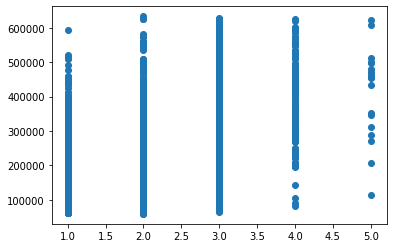

In [173]:
plt.scatter(data['Rooms'],data['Price'])

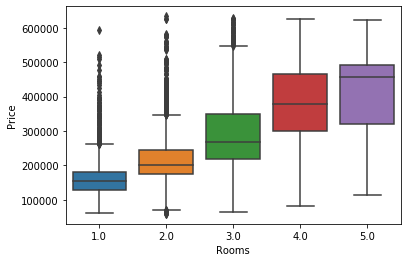

In [174]:
sns.boxplot(x=data['Rooms'],y=data['Price']);

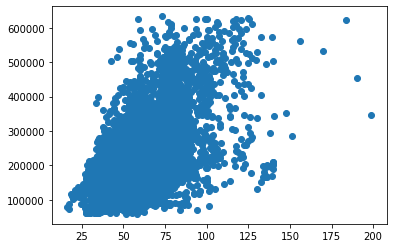

In [175]:
plt.scatter(data['Square'],data['Price'])

(array([ 274.,  639., 1141., 1648., 1905., 1262.,  887.,  545.,  394.,
         335.,  250.,  186.,  147.,  104.,   86.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

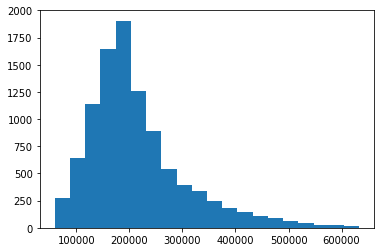

In [176]:
plt.hist(data['Price'],bins=20)

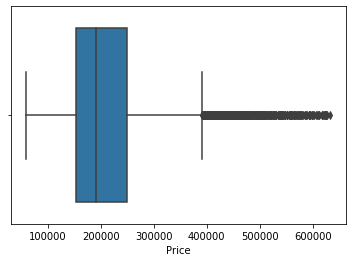

In [177]:
sns.boxplot(data['Price']);

In [178]:
data.Price.describe()

count      9983.000000
mean     214075.683623
std       92773.913427
min       59174.778028
25%      153903.011790
50%      192261.963270
75%      249094.979669
max      633233.466570
Name: Price, dtype: float64

Посмотрим параметры получившегося DataFrame:

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 23 columns):
Id               9983 non-null int64
DistrictId       9983 non-null int64
Rooms            9983 non-null float64
Square           9983 non-null float64
LifeSquare       9983 non-null float64
KitchenSquare    9983 non-null float64
Floor            9983 non-null int64
HouseFloor       9983 non-null float64
HouseYear        9983 non-null int64
Ecology_1        9983 non-null float64
Social_1         9983 non-null int64
Social_2         9983 non-null int64
Social_3         9983 non-null int64
Helthcare_2      9983 non-null int64
Shops_1          9983 non-null int64
Price            9983 non-null float64
Ecology_2_A      9983 non-null uint8
Ecology_2_B      9983 non-null uint8
Ecology_3_A      9983 non-null uint8
Ecology_3_B      9983 non-null uint8
Shops_2_A        9983 non-null uint8
Shops_2_B        9983 non-null uint8
mean_price       9983 non-null float64
dtypes: float64(8), int64(

In [180]:
data.shape

(9983, 23)

In [181]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,8381.504558,50.424922,1.887909,55.943500,35.541960,7.354314,8.526495,13.409847,1984.852950,0.118868,24.704998,5355.908645,8.050486,1.320044,4.233597,214075.683623,0.009717,0.990283,0.027547,0.972453,0.082440,0.917560,214075.683623
std,4859.487221,43.607711,0.811259,18.214623,14.630503,2.590048,5.234347,5.874642,18.408873,0.119034,17.530882,4006.570125,23.850467,1.493003,4.807987,92773.913427,0.098097,0.098097,0.163679,0.163679,0.275048,0.275048,74545.658522
min,0.000000,0.000000,1.000000,16.117154,0.370619,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82342.775873
25%,4167.500000,20.000000,1.000000,41.804019,24.834163,5.849144,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153903.011790,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,166014.055413
50%,8393.000000,36.000000,2.000000,52.543886,36.416530,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192261.963270,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,198777.278269
75%,12591.500000,75.000000,2.000000,65.700463,40.326706,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249094.979669,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,248821.481005
max,16798.000000,209.000000,5.000000,198.930182,211.231125,48.000000,42.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,624156.003381


In [182]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.000000,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.000000,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,5.849144,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.000000,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.000000,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,155748.415754


Определяем основные признаки, наиболее влияющие на цену и строим по ним модель:

In [183]:
features=data[['Rooms','Square','LifeSquare','mean_price']]
target=data['Price']

In [184]:
features.head()

,Rooms,Square,LifeSquare,mean_price
0,2.0,47.981561,29.442751,213160.076297
1,3.0,65.683640,40.049543,303643.563728
2,2.0,44.947953,29.197612,259938.729121
3,2.0,53.352981,52.731512,172368.882269
4,1.0,39.649192,23.776169,155748.415754


In [185]:
target.head()

0    184966.930730
1    300009.450063
2    220925.908524
3    175616.227217
4    150226.531644
Name: Price, dtype: float64

In [186]:
X_train,X_valid,y_train,y_valid=train_test_split(features,target,test_size=0.3, random_state=42)

In [187]:
params={
        'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75],
        'max_depth':[3,5,7]    
        }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [188]:
%%time
regr.fit(X_train,y_train)

Wall time: 11.3 s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

In [189]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 7, 'n_estimators': 75}

In [190]:
regr.best_score_

0.71118696404609

In [191]:
par_n_estimators=regr.best_params_['n_estimators']
par_min_samples_leaf=regr.best_params_['min_samples_leaf']
par_max_depth=regr.best_params_['max_depth']

In [192]:
print(par_n_estimators,par_min_samples_leaf,par_max_depth)

75 7 7


In [193]:
model1=LR()
model2=Ridge()
model3=RF()
model4=RF(n_estimators=par_n_estimators,max_depth=par_max_depth,min_samples_leaf=par_min_samples_leaf)


In [194]:
%%time
model1.fit(X_train,y_train)

Wall time: 3 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
%%time
model2.fit(X_train,y_train)

Wall time: 3 ms


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [196]:
%%time
model3.fit(X_train,y_train)

Wall time: 211 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [197]:
%%time
model4.fit(X_train,y_train)

Wall time: 500 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [198]:
y_pred_1=model1.predict(X_valid)
y_pred_2=model2.predict(X_valid)
y_pred_3=model3.predict(X_valid)
y_pred_4=model4.predict(X_valid)

In [199]:
print('Линейная регрессия',MSE(y_valid,y_pred_1),r2(y_valid,y_pred_1))

Линейная регрессия 2429643068.0528603 0.7228573659479811


In [200]:
print('Ridge регрессия',MSE(y_valid,y_pred_2),r2(y_valid,y_pred_2))

Ridge регрессия 2429625251.305162 0.7228593982548877


In [201]:
print('Случайный лес',MSE(y_valid,y_pred_3),r2(y_valid,y_pred_3))

Случайный лес 2460437383.3038416 0.719344743968768


In [202]:
print('Случайный лес c GridSearchCV',MSE(y_valid,y_pred_4),r2(y_valid,y_pred_4))

Случайный лес c GridSearchCV 2187704559.640873 0.7504546193806223


Лучшая оказалась Случайный лес c GridSearchCV регрессия

Загружаем и проверяем тест

In [203]:
test=pd.read_csv('test.csv')

In [204]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [205]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [206]:
test=prepare_square(test)

In [207]:
test=fillna_lifesquare(test,data)

In [208]:
test=join_stats1(test,stats1,data,mode='test')

In [209]:
test = test.drop(['Healthcare_1'],axis=1)

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
mean_price       5000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 781.2+ KB


In [211]:
temp=test[['Rooms','Square','LifeSquare','mean_price']]

In [212]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Rooms         5000 non-null float64
Square        5000 non-null float64
LifeSquare    5000 non-null float64
mean_price    5000 non-null float64
dtypes: float64(4)
memory usage: 195.3 KB


In [213]:
test['Price']=model4.predict(temp)

In [214]:
test[['Id','Price']].to_csv('AUkladnikov_predictions.csv',index=False)